In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/ab_test.csv")
df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


In [3]:
data_before = df[df['time'] == 'before'][['group', 'diff']]
data_before 

,group,diff
1,test,-6.000000
3,test,-3.500000
5,test,-148.000000
7,test,-112.500000
9,test,-69.333333
11,test,-53.000000
13,test,-70.000000
15,control,-103.000000
17,control,-15.500000
19,control,-3.000000


In [4]:
data_before.describe()

,diff
count,22.000000
mean,-87.856061
std,72.965660
min,-228.000000
25%,-151.750000
50%,-72.500000
75%,-16.125000
max,-3.000000


In [5]:
data_before = [data_before[data_before['group'] == group]['diff'].to_list() for group in ('control', 'test')]
data_before

[[-103.0,
  -15.5,
  -3.0,
  -153.0,
  -202.0,
  -16.0,
  -156.0,
  -75.0,
  -40.0,
  -3.5,
  -176.5,
  -95.0,
  -228.0,
  -16.5,
  -187.5],
 [-6.0, -3.5, -148.0, -112.5, -69.33333333333333, -53.0, -70.0]]

In [6]:
data_after = df[df['time'] == 'after'][['group', 'diff']]
data_after

,group,diff
0,test,-103.333333
2,test,-10.000000
4,test,-82.333333
6,test,-78.500000
8,test,-127.500000
10,test,-136.500000
12,test,-158.500000
14,control,-75.000000
16,control,-81.500000
18,control,-32.000000


In [7]:
data_after = [data_after[data_after['group'] == group]['diff'].to_list() for group in ('control', 'test')]
data_after

[[-75.0,
  -81.5,
  -32.0,
  17.5,
  -94.0,
  -49.0,
  -131.66666666666666,
  -322.6666666666667,
  -77.0,
  -9.0,
  -144.66666666666666,
  -114.5,
  -140.66666666666666,
  -93.33333333333331,
  -142.33333333333334],
 [-103.33333333333331,
  -10.0,
  -82.33333333333333,
  -78.5,
  -127.5,
  -136.5,
  -158.5]]

Text(0.5, 0.98, 'Lag before labs deadlines. After and before the Newsfeed')

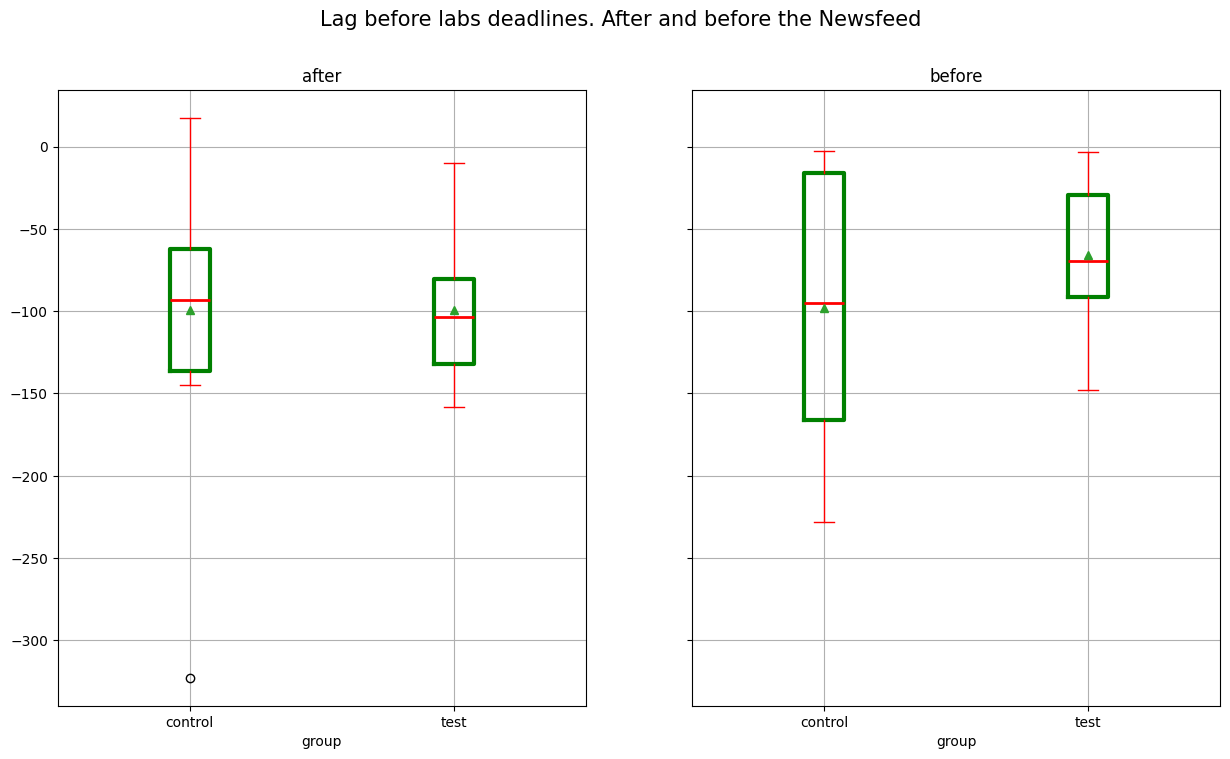

In [8]:
figure, axis = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

axis[0].boxplot(data_after,
                tick_labels=['control', 'test'],
                showmeans=True,
                boxprops={'color': 'green', 'linewidth': 3},
                medianprops={'color': 'red', 'linewidth': 2},
                whiskerprops={'color': 'red'},
                capprops={'color': 'red'})
axis[0].set_title('after')
axis[0].set_xlabel('group')
axis[0].grid('xy')

axis[1].boxplot(data_before,
                tick_labels=['control', 'test'],
                showmeans=True,
                boxprops={'color': 'green', 'linewidth': 3},
                medianprops={'color': 'red', 'linewidth': 2},
                whiskerprops={'color': 'red'},
                capprops={'color': 'red'})
axis[1].set_title('before')
axis[1].set_xlabel('group')
axis[1].grid('xy')

plt.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)


## What was the IQR of the control group before the newsfeed?” In your answer, put the approximate value that you can get just by looking at the graph, round it to the nearest 10
- 0 - (-150) = 150